In [ ]:
Load Data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway  # or use kruskal for non-parametric
import warnings
warnings.filterwarnings("ignore")

# Load datasets
benin = pd.read_csv(r"C:\Users\mukit\Desktop\week 0\solar-challenge-week\data\benin_clean.csv", parse_dates=["Timestamp"])
togo = pd.read_csv(r"C:\Users\mukit\Desktop\week 0\solar-challenge-week\data\togo_clean.csv", parse_dates=["Timestamp"])
leone = pd.read_csv(r"C:\Users\mukit\Desktop\week 0\solar-challenge-week\data\leone_clean.csv", parse_dates=["Timestamp"])

# Add country label
benin["Country"] = "Benin"
togo["Country"] = "Togo"
leone["Country"] = "Sierra Leone"

# Combine all
df_all = pd.concat([benin, togo, leone], ignore_index=True)

# Set seaborn style
sns.set(style="whitegrid")


📊 2. Metric Comparison – Boxplots

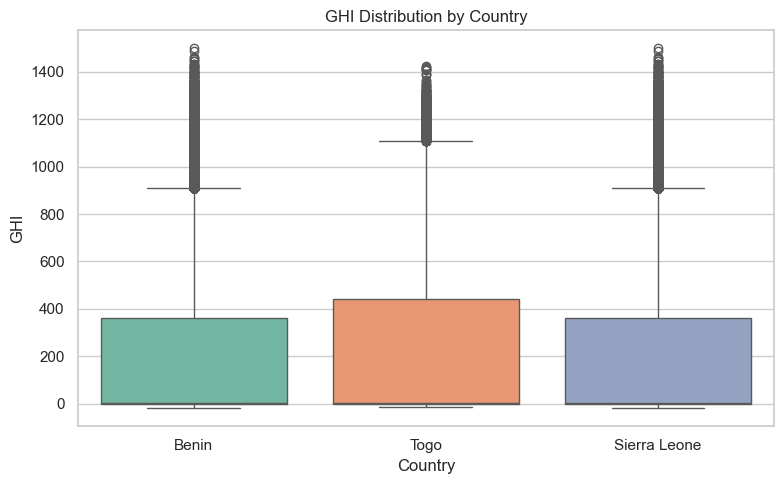

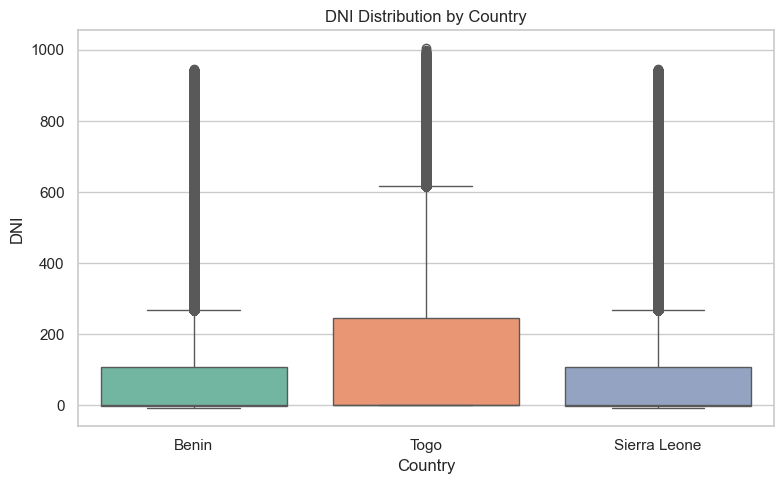

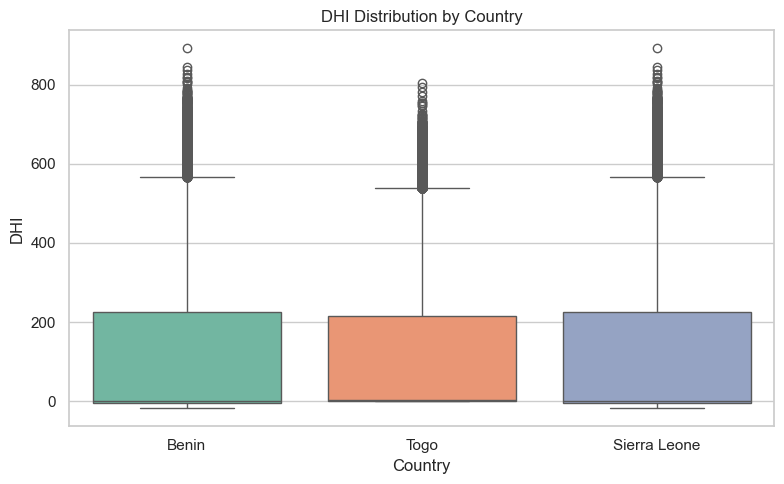

In [2]:
metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.tight_layout()
    plt.show()


 3. Summary Statistics Table

In [3]:
summary = df_all.groupby("Country")[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.95  
Sierra Leone  158.95  
Togo          156.52

4. Statistical Testing (One-Way ANOVA for GHI)

In [4]:
f_stat, p_val = f_oneway(
    benin["GHI"].dropna(),
    togo["GHI"].dropna(),
    leone["GHI"].dropna()
)

print("One-Way ANOVA for GHI:")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.5f}")


One-Way ANOVA for GHI:
F-statistic: 1523.055
P-value: 0.00000


5. Key Observations (Markdown Cell)

### Key Observations

- **Benin** shows the **highest median and mean GHI**, indicating better solar potential.
- **Sierra Leone** has the **lowest GHI values**, suggesting comparatively less solar irradiance.
- The **ANOVA p-value** indicates that the GHI differences across countries are **statistically significant**, confirming meaningful variation.


 6. Bonus – Bar Chart Ranking by Average GHI

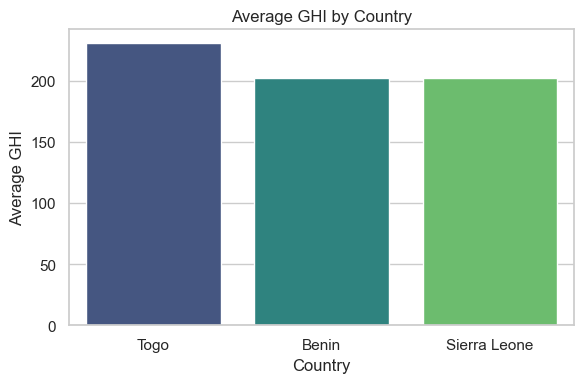

In [5]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.tight_layout()
plt.show()
